In [12]:
!pip install -q kaggle

upload kaggle.json file

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cashgupta","key":"2ba1ead8f0aeb8e0fecaa560d15d6df8"}'}

In [39]:
! mkdir ~/kaggle

In [20]:
!cp kaggle.json ~/.kaggle/

In [45]:
! chmod 600  /content/drive/MyDrive/kaggle/kaggle.json

In [47]:
cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


Download Vehicle dataset from cardekho kaggle.

In [51]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 14.4MB/s]


In [52]:
! unzip vehicle-dataset-from-cardekho.zip

Archive:  vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


Importing Libraries

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble

%matplotlib inline

Read CSV file

In [222]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [223]:
df.groupby('Year').agg('count')

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,,,,,,,,
2003,2,2,2,2,2,2,2,2
2004,1,1,1,1,1,1,1,1
2005,4,4,4,4,4,4,4,4
2006,4,4,4,4,4,4,4,4
2007,2,2,2,2,2,2,2,2
2008,7,7,7,7,7,7,7,7
2009,6,6,6,6,6,6,6,6
2010,15,15,15,15,15,15,15,15
2011,19,19,19,19,19,19,19,19


Plot of Selling Price




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


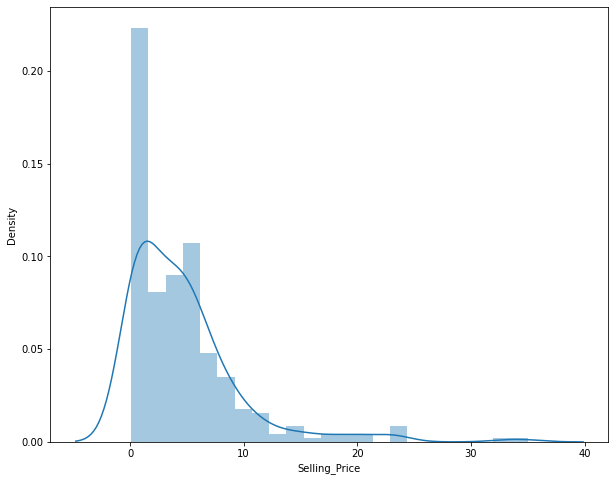

In [225]:
plt.figure(figsize = (10, 8))
sns.distplot(df['Selling_Price'])
plt.show()

Plot of Present Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


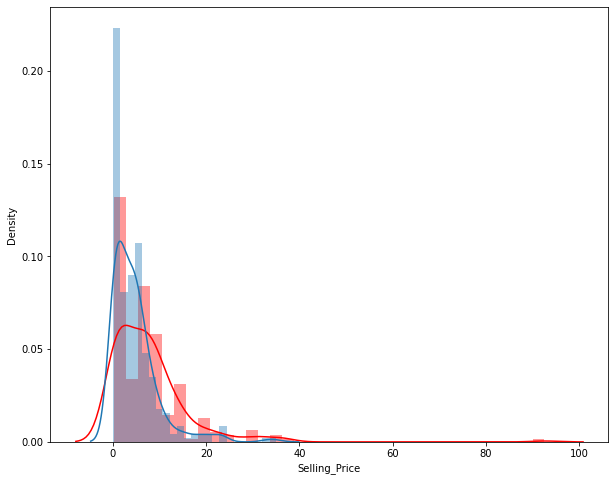

In [226]:
plt.figure(figsize = (10, 8))
sns.distplot(df['Present_Price'],color = 'red')
sns.distplot(df['Selling_Price'])
plt.show()

Correlation Matrix

In [227]:
corr_matrix = df.corr()

In [228]:
corr_matrix['Selling_Price'].sort_values(ascending = False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

Plotting Scatter matrix plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac65941890>,
      dtype=object)

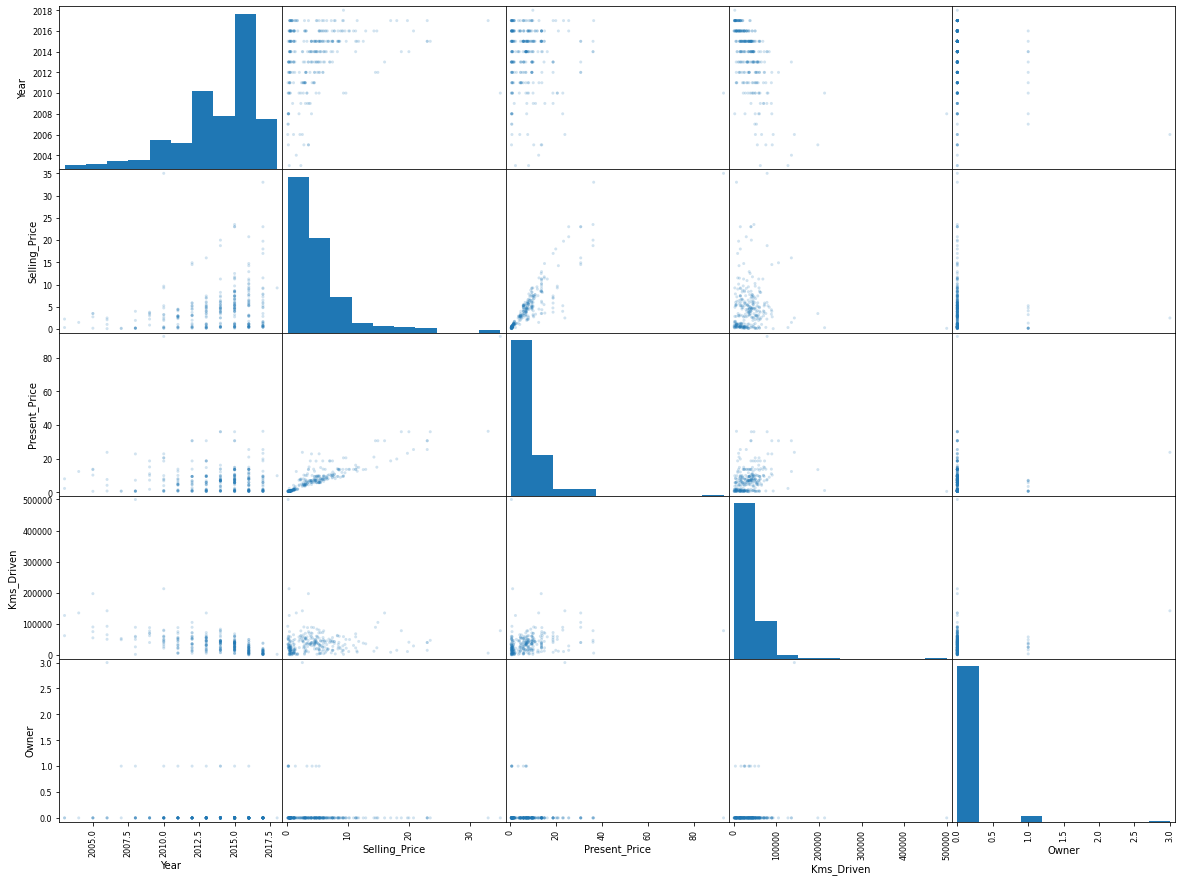

In [229]:
pd.plotting.scatter_matrix(df,figsize = (20,15), alpha=0.2)

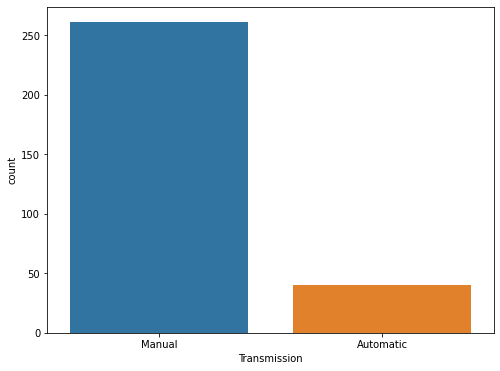

In [230]:
plt.figure(figsize = (8, 6))
sns.countplot( x = 'Transmission', data=df )
plt.show()

Plotting Fuel type vs Selling Price

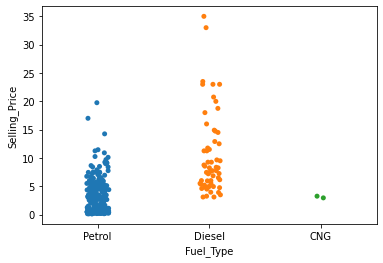

In [231]:
sns.stripplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.show()

Plotting Year  vs Selling Price

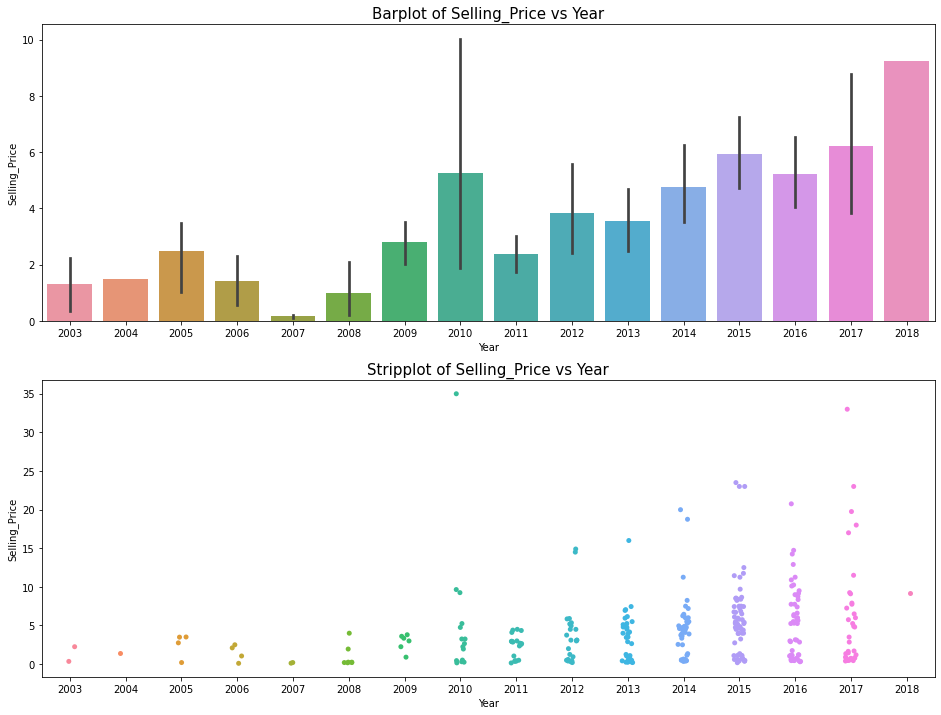

In [232]:
f, ax = plt.subplots(2, 1, figsize=(16, 12) )

sns.barplot(x = 'Year', y = 'Selling_Price', data = df, ax = ax[0])
ax[0].set_title("Barplot of Selling_Price vs Year", fontsize=15)

sns.stripplot(x="Year", y="Selling_Price", data=df, ax = ax[1])
ax[1].set_title("Stripplot of Selling_Price vs Year", fontsize=15)

plt.show()

Replacing Year with contious values

In [233]:
df['Year'].replace({2010 : 1, 2011 : 2, 2012 : 3, 2013 : 4, 2014 : 5, 2015 : 6, 2016 : 7, 2017 : 8, 2018 : 9}, inplace=True)
df.loc[(df['Year'] >= 2003) & (df['Year']<= 2009), 'Year'] = 0
df['Year'].value_counts()

6    61
7    50
5    38
8    35
4    33
0    26
3    23
2    19
1    15
9     1
Name: Year, dtype: int64

Converting Text data of Fuel type to digit

In [234]:
df['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2}, inplace=True)
df['Seller_Type'].replace({'Dealer':0, 'Individual':1}, inplace=True)
df['Transmission'].replace({'Manual':0, 'Automatic':1}, inplace=True)

In [235]:
df.drop('Car_Name', axis=1, inplace=True)

Convert Categorical to Numerical

In [236]:
df.loc[(df['Kms_Driven'] >= 500) & (df['Kms_Driven'] <= 15000), 'Kms_Driven'] = 0
df.loc[(df['Kms_Driven'] > 15000) & (df['Kms_Driven'] <= 32000), 'Kms_Driven'] = 1
df.loc[(df['Kms_Driven'] > 32000) & (df['Kms_Driven'] <= 49000), 'Kms_Driven'] = 2
df.loc[(df['Kms_Driven'] > 49000), 'Kms_Driven'] = 3

Getting X and Y attributes for splitting

In [237]:
x = df.drop(['Selling_Price'],axis = 'columns')
y = df['Selling_Price']
x = RobustScaler().fit_transform(x)

Splitting the Dataset to Traing and Testing dataset

In [238]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

x = RobustScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 7), (61, 7), (240,), (61,))

Training model Using Linear Regression

In [239]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
model.score(x_test,y_test)

0.8634477078786768

Training model using DecisionTreeRegressor

In [240]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9777165063887163

Training model using Ridge

In [241]:
model = Ridge(alpha = 0.1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8051381293623833

Training model using ensemble.GradientBoostingRegressor

In [242]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8339487268928516

Saving the model for further use

In [243]:
joblib.dump(model, 'model.pkl')

['model.pkl']